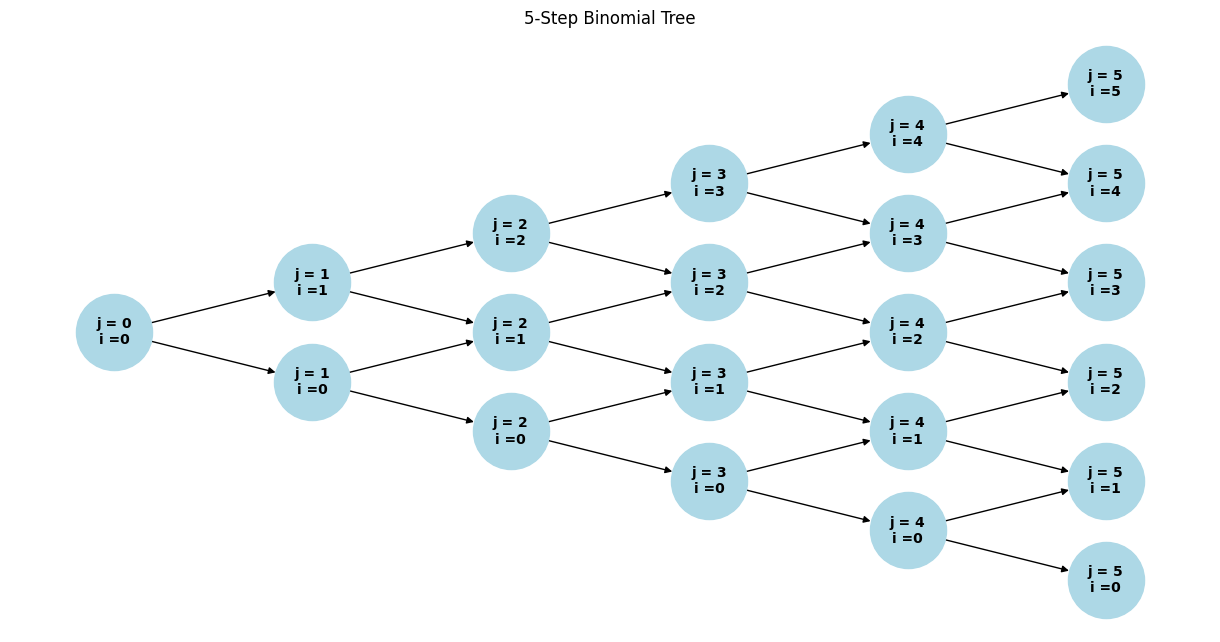

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# Parameters
steps = 5

# Initialize a directed graph
G = nx.DiGraph()

# Add nodes and edges to construct the binomial tree
for j in range(steps + 1):
    for i in range(j + 1):
        # Center each row by offsetting nodes horizontally around the midpoint
        G.add_node((j, i), pos=(j, i - j / 2))  # Position nodes with horizontal centering
        if j < steps:
            G.add_edge((j, i), (j + 1, i))       # Downward edge
            G.add_edge((j, i), (j + 1, i + 1))   # Upward edge

# Extract positions for layout
pos = nx.get_node_attributes(G, 'pos')

# Custom labels to show "j = x, i = y" format inside each node
#labels = {(j, i): f"j = {j}, i = {i}" for j, i in G.nodes()}
labels = {(j, i): f"j = {j}\ni ={i}" for j, i in G.nodes()}

# Draw the binomial tree with symmetric layout
plt.figure(figsize=(12, 6))
nx.draw(G, pos, labels=labels, with_labels=True, node_size=3000, node_color="lightblue",font_weight="bold", font_color="black", font_size=10)
plt.title("5-Step Binomial Tree")
plt.show()


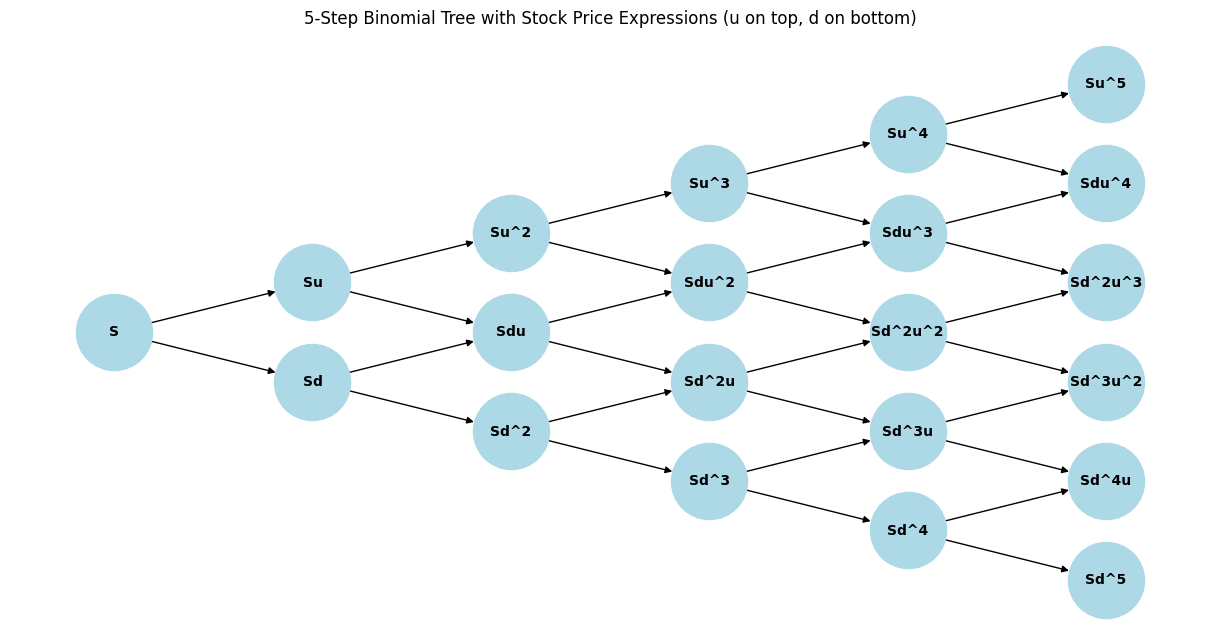

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

# Parameters
steps = 5

# Initialize a directed graph
G = nx.DiGraph()

# Generate the nodes and edges with the required labels
for j in range(steps + 1):
    for i in range(j + 1):
        # Number of upward (u) and downward (d) moves
        upward_moves = j - i
        downward_moves = i
        label = "S"  # Start with S
        if upward_moves > 0:
            label += f"d^{upward_moves}" if upward_moves > 1 else "d"
        if downward_moves > 0:
            label += f"u^{downward_moves}" if downward_moves > 1 else "u"
        
        # Position nodes with horizontal centering and set node attributes
        G.add_node((j, i), pos=(j, i - j / 2), label=label)
        
        # Add edges
        if j < steps:
            G.add_edge((j, i), (j + 1, i))       # Downward edge
            G.add_edge((j, i), (j + 1, i + 1))   # Upward edge

# Extract positions for layout
pos = nx.get_node_attributes(G, 'pos')
labels = nx.get_node_attributes(G, 'label')

# Draw the binomial tree with formatted labels
plt.figure(figsize=(12, 6))
nx.draw(G, pos, labels=labels, with_labels=True, node_size=3000, node_color="lightblue",font_weight="bold", font_color="black", font_size=10)
plt.title("5-Step Binomial Tree with Stock Price Expressions (u on top, d on bottom)")
plt.show()


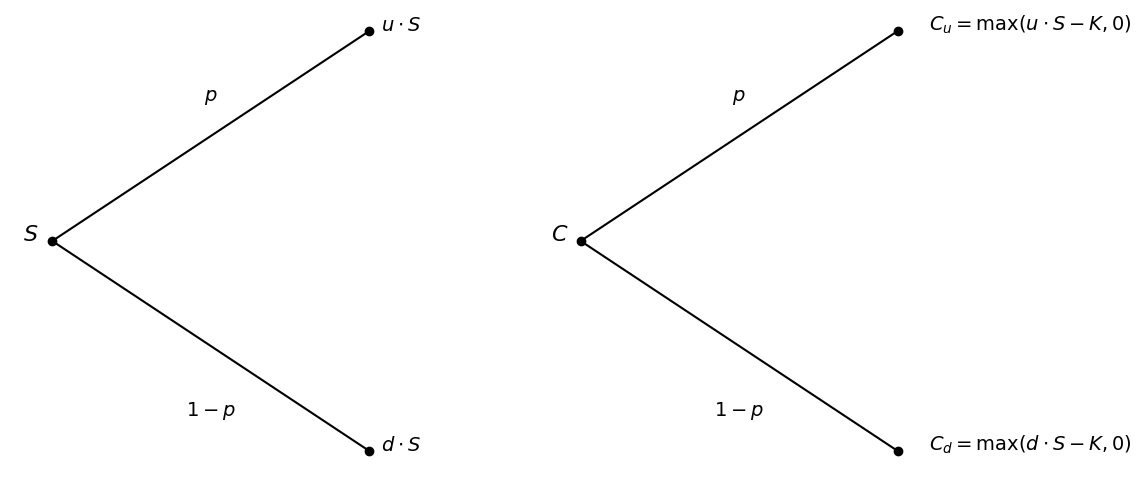

In [24]:
import matplotlib.pyplot as plt

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis("off")

# Coordinates for the stock price tree nodes
S_x, S_y = 0.2, 0.5
up_x, up_y = 0.5, 0.8
down_x, down_y = 0.5, 0.2

# Coordinates for the option price tree nodes
C_x, C_y = 0.7, 0.5
Cu_x, Cu_y = 1.0, 0.8
Cd_x, Cd_y = 1.0, 0.2

# Draw stock price tree
ax.plot([S_x, up_x], [S_y, up_y], 'k-')
ax.plot([S_x, down_x], [S_y, down_y], 'k-')
ax.plot(up_x, up_y, 'ko')
ax.plot(S_x, S_y, 'ko')
ax.plot(down_x, down_y, 'ko')

# Label stock price tree
ax.text(S_x - 0.02, S_y, r"$S$", ha="center", fontsize=16)
ax.text(up_x + 0.03, up_y, r"$u \cdot S$", ha="center", fontsize=14)
ax.text(down_x + 0.03, down_y, r"$d \cdot S$", ha="center", fontsize=14)
ax.text(0.35, 0.70, r"$p$", ha="center", fontsize=14)
ax.text(0.35, 0.25, r"$1 - p$", ha="center", fontsize=14)

# Draw option price tree
ax.plot([C_x, Cu_x], [C_y, Cu_y], 'k-')
ax.plot([C_x, Cd_x], [C_y, Cd_y], 'k-')
ax.plot(Cu_x, Cu_y, 'ko')
ax.plot(C_x, C_y, 'ko')
ax.plot(Cd_x, Cd_y, 'ko')

# Label option price tree
ax.text(C_x - 0.02, C_y, r"$C$", ha="center", fontsize=16)
ax.text(Cu_x + 0.03, Cu_y, r"$C_u = \max(u \cdot S - K, 0)$", ha="left", fontsize=14)
ax.text(Cd_x + 0.03, Cd_y, r"$C_d = \max(d \cdot S - K, 0)$", ha="left", fontsize=14)
ax.text(0.85, 0.70, r"$p$", ha="center", fontsize=14)
ax.text(0.85, 0.25, r"$1 - p$", ha="center", fontsize=14)

plt.show()


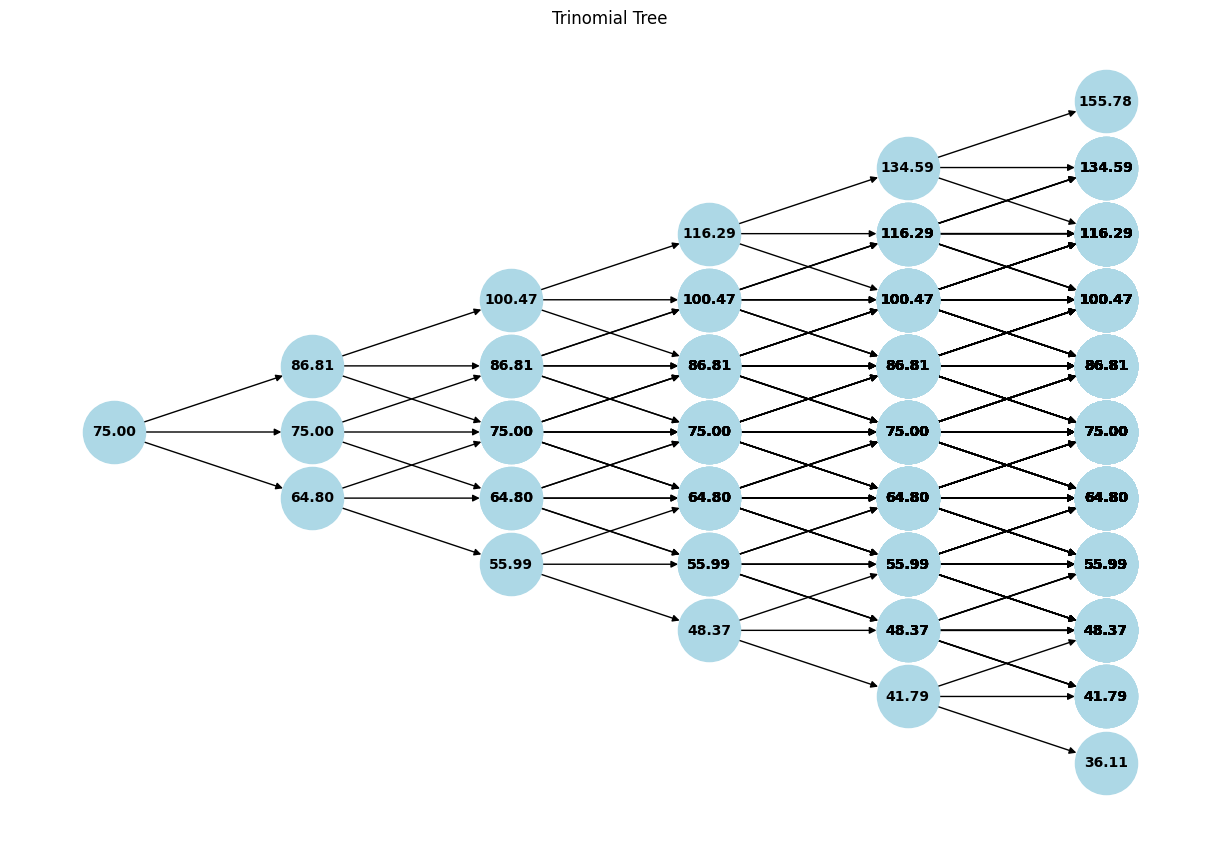

In [34]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, price, step):
        self.price = price
        self.value = None
        self.up = None
        self.mid = None
        self.down = None
        self.step = step

class Tree:
    def __init__(self, nb_steps, delta_t):
        self.alpha = None
        self.root = None
        self.nb_steps = nb_steps
        self.delta_t = delta_t

    def compute_alpha(self, r, sigma):
        """ Calculate alpha for the tree based on market parameters. """
        self.alpha = 1 + np.sqrt(3 * (np.exp(sigma ** 2 * self.delta_t) - 1)) * np.exp(r * self.delta_t)

    def build_tree(self, S0):
        """ Build the trinomial tree with specified steps. """
        self.root = Node(S0, step=0)
        current_nodes = [self.root]
        
        for step in range(1, self.nb_steps + 1):
            next_nodes = []
            for node in current_nodes:
                up_price = node.price * self.alpha
                mid_price = node.price
                down_price = node.price / self.alpha
                
                node.up = Node(up_price, step)
                node.mid = Node(mid_price, step)
                node.down = Node(down_price, step)
                
                next_nodes.extend([node.up, node.mid, node.down])
            current_nodes = next_nodes

    def plot_tree(self):
        """ Plot the tree structure using networkx. """
        G = nx.DiGraph()
        pos = {}

        # Traverse the tree to add nodes and edges
        def traverse(node, pos_x, pos_y):
            if node is None:
                return
            # Add the node with its position
            G.add_node(id(node), price=node.price)
            pos[id(node)] = (pos_x, pos_y)

            # Recursively add children
            if node.up:
                G.add_edge(id(node), id(node.up))
                traverse(node.up, pos_x + 1, pos_y + 1)
            if node.mid:
                G.add_edge(id(node), id(node.mid))
                traverse(node.mid, pos_x + 1, pos_y)
            if node.down:
                G.add_edge(id(node), id(node.down))
                traverse(node.down, pos_x + 1, pos_y - 1)

        # Start traversing from the root
        traverse(self.root, 0, 0)

        # Plot the tree with labeled nodes
        labels = {node: f"{data['price']:.2f}" for node, data in G.nodes(data=True)}
        plt.figure(figsize=(12, 8))
        nx.draw(G, pos, labels=labels, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold")
        plt.xlabel("Steps")
        plt.ylabel("Price")
        plt.title("Trinomial Tree")
        plt.show()

# Define market and option parameters
#interest_rate = 0.05
#volatility = 0.2
#start_price = 100
nb_steps = 5
delta_t = 1 / nb_steps

S0 = 75                             # Initial stock price
F = 100                             # Face value of the bond
X = 100                             # Strike price for conversion
T = 5                               # Time to maturity (in years)
r = 0.07                            # Risk-free rate
q = 0
b = r - q
k = 0.03                            # Credit spread
sigma = 0.2                         # Volatility
dt = 1
coupon = 6                          # Coupon payment per year
m = 1                               # Conversion ratio (1 bond = 1 stock)
N = 5                               # Number of time steps
conversion_ratio = F / X            # Conversion ratio

# Create the tree and build it
tree = Tree(nb_steps, delta_t)
tree.compute_alpha(r, sigma)
tree.build_tree(S0)

# Plot the trinomial tree
tree.plot_tree()


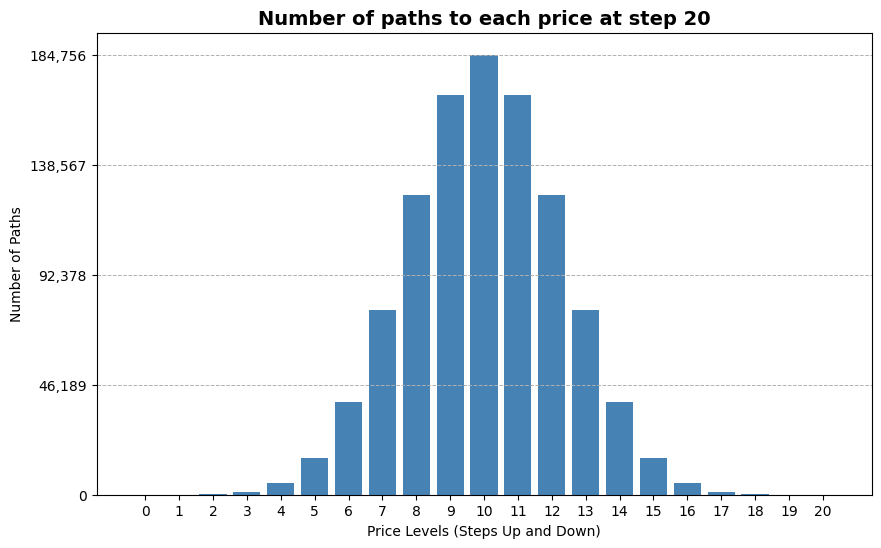

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb

# Parameters
n_steps = 20  # Total steps (up or down)
max_price_level = n_steps + 1  # Possible price levels from 0 to 20

# Compute number of paths to each price level (Binomial distribution)
# Paths to achieve k ups in n steps is given by comb(n, k)
path_counts = [comb(n_steps, k) for k in range(max_price_level)]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(max_price_level), path_counts, color="steelblue")

# Customize plot
plt.title("Number of paths to each price at step 20", fontsize=14, weight='bold')
plt.xlabel("Price Levels (Steps Up and Down)")
plt.ylabel("Number of Paths")
plt.xticks(range(max_price_level), [f"{k}" for k in range(max_price_level)])
plt.yticks(np.linspace(0, max(path_counts), 5), [f"{int(i):,}" for i in np.linspace(0, max(path_counts), 5)])
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Show plot
plt.show()



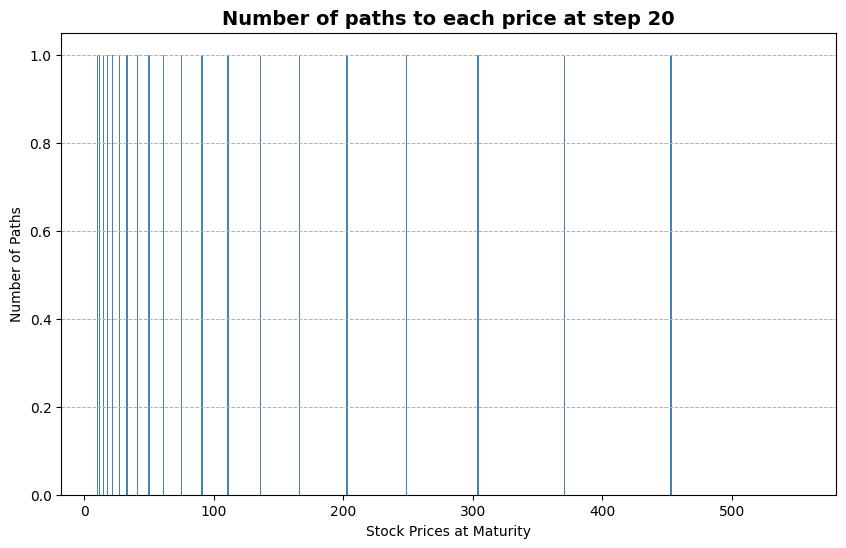

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb

# Parameters
S0 = 75                             # Initial stock price
F = 100                             # Face value of the bond
X = 100                             # Strike price for conversion
T = 5                               # Time to maturity (in years)
r = 0.07                            # Risk-free rate
q = 0
b = r - q
k = 0.03                            # Credit spread
sigma = 0.2                         # Volatility
dt = 1
coupon = 6                          # Coupon payment per year
m = 1                               # Conversion ratio (1 bond = 1 stock)
N = 20                              # Number of time steps
conversion_ratio = F / X            # Conversion ratio

# Convertible bond pricing model (Cox-Ross-Rubinstein method)
def CRR_convertible_bond(S0, T, r, N, sigma):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))     # Up factor
    d = 1 / u                           # Down factor
    StockPrice = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        for j in range(i + 1):
            StockPrice[j, i] = S0 * (u ** j) * (d ** (i - j))
    return StockPrice

# Calculate the stock price tree
StockPrice = CRR_convertible_bond(S0, T, r, N, sigma)

# Extract final stock prices at maturity
final_prices = StockPrice[:, N]

# Plot histogram of final prices
plt.figure(figsize=(10, 6))
plt.hist(final_prices, bins=range(int(min(final_prices)), int(max(final_prices)) + 1), align='left', color="steelblue")
plt.title("Number of paths to each price at step 20", fontsize=14, weight='bold')
plt.xlabel("Stock Prices at Maturity")
plt.ylabel("Number of Paths")
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()
